# Gráficos Covid 19 Itália


### Ana Pinto a93660

In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot
from qgis.core import *
from qgis.PyQt.QtGui import *
from qgis.PyQt.QtCore import *
from IPython.display import Image

Start Qgis with GUI and start a project

In [3]:
QgsApplication.setPrefixPath(r'C:\\OSGeo4W64\\apps\\qgis', True)
qgs = QgsApplication([], True)
qgs.initQgis()
sys.path.append(r'C:\OSGeo4W64\apps\qgis\python\plugins')
project = QgsProject.instance()

In [4]:
path = "C:\\OSGeo4W64\\bin\\SIG\\IT\\Shapes\\ITA_adm1.shp"
map_layer = QgsVectorLayer(path, 'Italy map', 'ogr')

if not map_layer.isValid():
    print("Failed to load the layer!")
else:
    project.addMapLayer(map_layer)
    print("Sucess")

Sucess


In [5]:
csv_path = "file:///C:\\OSGeo4W64\\bin\\SIG\\IT\\dpc-covid19-ita-regionii.csv?delimiter=,'"
csv_layer = QgsVectorLayer(csv_path, 'Data', 'delimitedtext')

if not csv_layer.isValid():
    print('Layer failed to load!')
else:
    project.addMapLayer(csv_layer)
    print("Sucess")

Sucess


In [6]:
joinName = 'denominazione_regione'
targetName = 'NAME_1'

joinObject = QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(joinName)
joinObject.setTargetFieldName(targetName)
joinObject.setJoinLayerId(csv_layer.id())
joinObject.setUsingMemoryCache(True)
joinObject.setJoinLayer(csv_layer)
flag = map_layer.addJoin(joinObject)

In [7]:
dict = []

for feature in map_layer.getFeatures():
    if feature['NAME_1']:
        province = feature['NAME_1']
        if feature['Data_deceduti']:
            deceduti = feature['Data_deceduti']
        else:
            deceduti = 0
        if feature['Data_totale_casi']:
            totale = feature['Data_totale_casi']
        else:
            totale = 0
        if feature['Data_totale_ospedalizzati']: #hospitalizados
            ospedalizzati = feature['Data_totale_ospedalizzati']
        else:
            ospedalizzati = 0
        if feature['Data_isolamento_domiciliare']: #casa
            domiciliare = feature['Data_isolamento_domiciliare']
        else:
            domiciliare = 0
    e = {'Province': province, 'Totale casi': totale, 'Deceduti': deceduti, 'Ospedalizzati': ospedalizzati, 'Domiciliare': domiciliare }
    dict.append(e)

In [8]:
size = len(dict)-5

c = sorted(dict, key = lambda i: i['Totale casi'],reverse=True)
d = sorted(dict, key = lambda i: i['Deceduti'],reverse=True)
r = sorted(dict, key = lambda i: i['Ospedalizzati'],reverse=True)
v= sorted(dict, key = lambda i: i['Domiciliare'],reverse=True)

top5totale = c[0:5]
top5deceduti = d[0:5]
top5ospedalizzati = r[0:5]
top5domiciliare = v[0:5]

bottom5totale = c[size:]
bottom5deceduti = d[size:]

# Gráfico I: Top 5 com maior número de casos

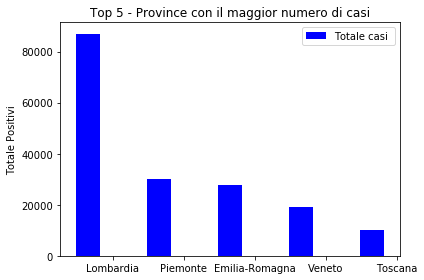

In [9]:
delta1 = [top5totale[0]['Totale casi'],top5totale[1]['Totale casi'],top5totale[2]['Totale casi'],top5totale[3]['Totale casi'],top5totale[4]['Totale casi']]
province = [top5totale[0]['Province'],top5totale[1]['Province'],top5totale[2]['Province'],top5totale[3]['Province'],top5totale[4]['Province']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Totale casi ', color=['blue'])

plt.ylabel('Totale Positivi')
plt.title('Top 5 - Province con il maggior numero di casi') #maior
plt.xticks(index + bar_width,province)
plt.legend()
plt.savefig('C:/OSGeo4W64/bin/SIG/IT/Top5_total.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

# Gráfico II: Top 5 com menos casos 

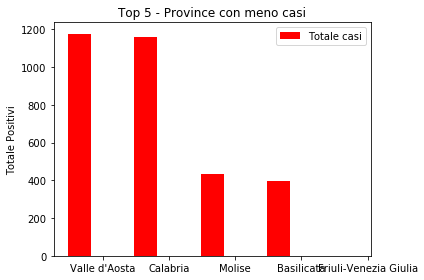

In [10]:
delta1 = [bottom5totale[0]['Totale casi'],bottom5totale[1]['Totale casi'],bottom5totale[2]['Totale casi'],bottom5totale[3]['Totale casi'],bottom5totale[4]['Totale casi']]
province = [bottom5totale[0]['Province'],bottom5totale[1]['Province'],bottom5totale[2]['Province'],bottom5totale[3]['Province'],bottom5totale[4]['Province']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Totale casi', color=['red'])

plt.ylabel('Totale Positivi')
plt.title('Top 5 - Province con meno casi')
plt.xticks(index + bar_width,province)
plt.legend()
plt.savefig('C:/OSGeo4W64/bin/SIG/IT/Bottom5_total.png', dpi=300, format='png')
plt.tight_layout()
plt.show()


# Gráfico III: Top 5 com mais casos de óbitos

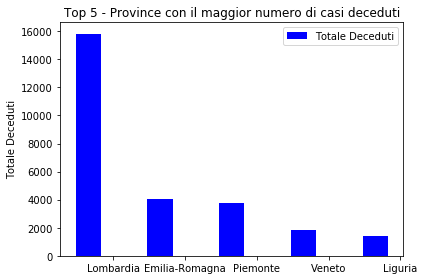

In [11]:
delta1 = [top5deceduti[0]['Deceduti'],top5deceduti[1]['Deceduti'],top5deceduti[2]['Deceduti'],top5deceduti[3]['Deceduti'],top5deceduti[4]['Deceduti']]
province = [top5deceduti[0]['Province'],top5deceduti[1]['Province'],top5deceduti[2]['Province'],top5deceduti[3]['Province'],top5deceduti[4]['Province']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Totale Deceduti', color=['blue'])

plt.ylabel('Totale Deceduti')
plt.title('Top 5 - Province con il maggior numero di casi deceduti')
plt.xticks(index + bar_width,province)
plt.legend()
plt.savefig('C:/OSGeo4W64/bin/SIG/IT/Top5_deceduti.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

# Gráfico IV: Top 5 com menos casos de óbitos

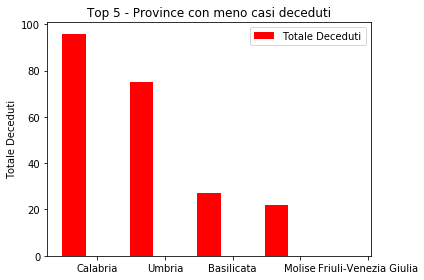

In [12]:
delta1 = [bottom5deceduti[0]['Deceduti'],bottom5deceduti[1]['Deceduti'],bottom5deceduti[2]['Deceduti'],bottom5deceduti[3]['Deceduti'],bottom5deceduti[4]['Deceduti']]
province = [bottom5deceduti[0]['Province'],bottom5deceduti[1]['Province'],bottom5deceduti[2]['Province'],bottom5deceduti[3]['Province'],bottom5deceduti[4]['Province']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Totale Deceduti', color=['red'])

plt.ylabel('Totale Deceduti')
plt.title('Top 5 - Province con meno casi deceduti')
plt.xticks(index + bar_width,province)
plt.legend()
plt.savefig('C:/OSGeo4W64/bin/SIG/IT/Bottom5_deceduti.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

# Gráfico V: Top 5 com maior número de casos em casa

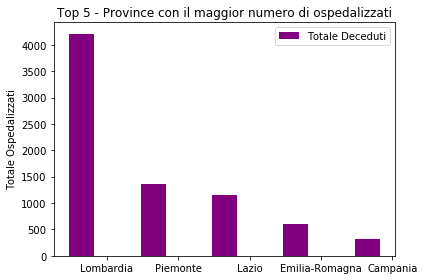

In [13]:
delta1 = [top5ospedalizzati[0]['Ospedalizzati'],top5ospedalizzati[1]['Ospedalizzati'],top5ospedalizzati[2]['Ospedalizzati'],top5ospedalizzati[3]['Ospedalizzati'],top5ospedalizzati[4]['Ospedalizzati']]
province = [top5ospedalizzati[0]['Province'],top5ospedalizzati[1]['Province'],top5ospedalizzati[2]['Province'],top5ospedalizzati[3]['Province'],top5ospedalizzati[4]['Province']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Totale Deceduti', color=['purple'])

plt.ylabel('Totale Ospedalizzati')
plt.title('Top 5 - Province con il maggior numero di ospedalizzati')
plt.xticks(index + bar_width,province)
plt.legend()
plt.savefig('C:/OSGeo4W64/bin/SIG/IT/Top5_ospedalizzati.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

# Gráfico VI: Top 5 com maior número de casos hospitalizados

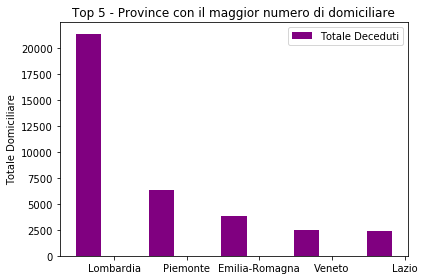

In [14]:
delta1 = [top5domiciliare[0]['Domiciliare'],top5domiciliare[1]['Domiciliare'],top5domiciliare[2]['Domiciliare'],top5domiciliare[3]['Domiciliare'],top5domiciliare[4]['Domiciliare']]
province = [top5domiciliare[0]['Province'],top5domiciliare[1]['Province'],top5domiciliare[2]['Province'],top5domiciliare[3]['Province'],top5domiciliare[4]['Province']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Totale Deceduti', color=['purple'])

plt.ylabel('Totale Domiciliare')
plt.title('Top 5 - Province con il maggior numero di domiciliare')
plt.xticks(index + bar_width,province)
plt.legend()
plt.savefig('C:/OSGeo4W64/bin/SIG/IT/Top5_Domiciliare.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

# Bar chart comparando Lombardia e Toscana

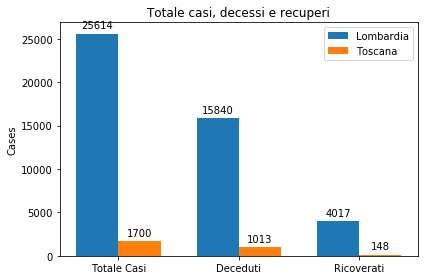

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Totale Casi', 'Deceduti', 'Ricoverati']
Lombardia_means = []
Toscana_means = []

for feature in map_layer.getFeatures():
    if feature['NAME_1']=="Lombardia":
        Lombardia_means.append(feature['Data_totale_positivi'])
        Lombardia_means.append(feature['Data_deceduti'])
        Lombardia_means.append(feature['Data_ricoverati_con_sintomi'])

for feature in map_layer.getFeatures():
    if feature['NAME_1']=="Toscana":
        Toscana_means.append(feature['Data_totale_positivi'])
        Toscana_means.append(feature['Data_deceduti'])
        Toscana_means.append(feature['Data_ricoverati_con_sintomi'])
        
        
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Lombardia_means, width, label='Lombardia')
rects2 = ax.bar(x + width/2, Toscana_means, width, label='Toscana')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cases')
ax.set_title('Totale casi, decessi e recuperi')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
plt.savefig('C:/OSGeo4W64/bin/SIG/IT/Maxmin.png', dpi=300, format='png')
fig.tight_layout()

plt.show()

# Gráfico VII: Total de casos 

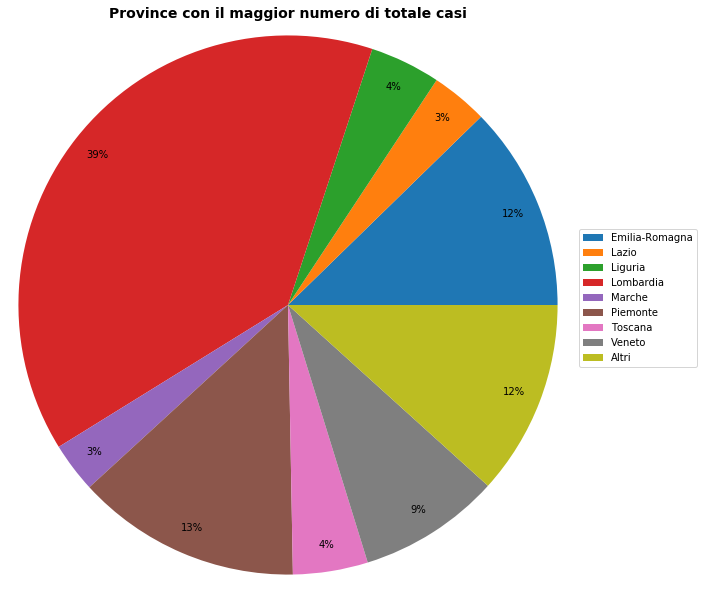

In [16]:
values = []
labels = []
total = 0
lowerTotal = 0
i = 0

for feature in map_layer.getFeatures():
    if feature['Data_totale_casi']:
        total += feature['Data_totale_casi']

for feature in map_layer.getFeatures():
    if feature['Data_totale_casi']:
        if (feature['Data_totale_casi']/total) > 0.025:
            values.append(feature['Data_totale_casi'])
            labels.append(feature['NAME_1'])
        else:
            lowerTotal += feature['Data_totale_casi']
            
            
plt.subplots(figsize=(10,10))
values.append(lowerTotal)
labels.append("Altri") #Outros


pie = plt.pie(values, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2)
plt.title('Province con il maggior numero di totale casi', weight='bold', size=14)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.savefig('C:/OSGeo4W64/bin/SIG/IT/totale_casi.png', dpi=300, format='png')
plt.show()
plt.clf()
plt.close() 

# Gráfico VIII Número de Recuperados em Lombardia 
## Desde 24/02 a 24/05

In [46]:
csv_path = "file:///C:\\OSGeo4W64\\bin\\SIG\\IT\\dpc-covid19-ita-regioni.csv?delimiter=,'"  
csv_layer = QgsVectorLayer(csv_path, 'Data', 'delimitedtext')

if not csv_layer.isValid():
    print('Layer failed to load!')
else:
    project.addMapLayer(csv_layer)
    print("Sucess")

Sucess


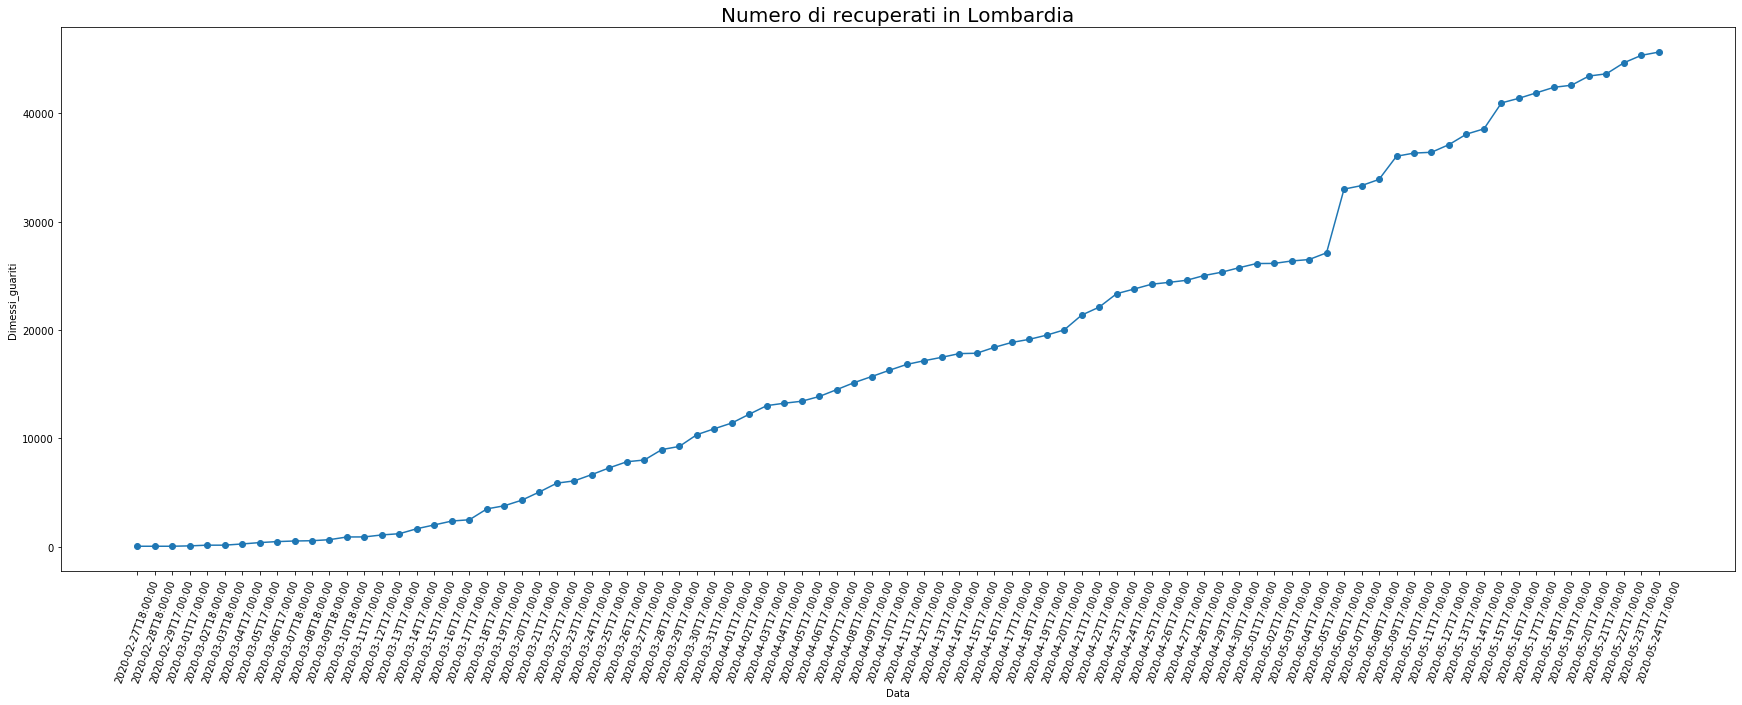

In [50]:
values = []
labels = []
datas = []
lowerTotal = 0
i = 0


for feature in csv_layer.getFeatures():
    if feature['denominazione_regione']=="Lombardia":
        if feature['dimessi_guariti']>0:
            values.append(feature['dimessi_guariti'])
            labels.append(feature['data'])
            

fig = plt.figure(figsize=[30,10]);

cov_date = pd.Series(values, index=labels)
plt.xlabel('Data')
plt.tick_params(axis='x', rotation=70)
plt.ylabel('Dimessi_guariti')
plt.title('Numero di recuperati in Lombardia', fontsize=20)
plt.plot(cov_date, 'o-')
plt.savefig('C:/OSGeo4W64/bin/SIG/IT/recuperados.png', dpi=300, format='png')

# Gráfico IX Número de casos de COVID19 ao longo dos dias em Lombardia

Foram utilizados apenas os dados da província de Lombardia uma vez que apresenta 39% do total de casos.

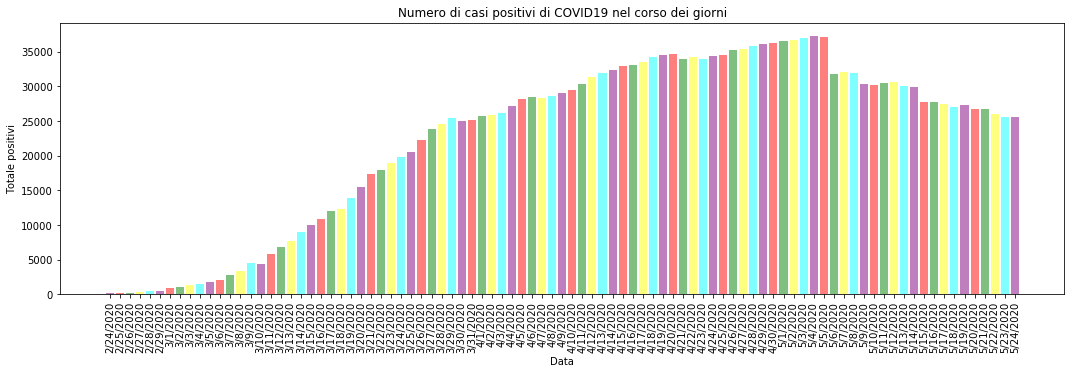

In [17]:
values = []
labels = []
datas = []
lowerTotal = 0
i = 0


for feature in csv_layer.getFeatures():
    if feature['denominazione_regione']=="Lombardia":
        values.append(feature['totale_positivi'])
        labels.append(feature['data'])

fig, ax = plt.subplots(figsize=(18,5))        
y_pos = np.arange(len(labels))

plt.bar(y_pos, values, align='center', alpha=0.5, color=['purple', 'red', 'green', 'yellow', 'cyan'])
plt.xticks(y_pos, labels, rotation='vertical')
plt.ylabel('Totale positivi')
plt.xlabel('Data')
plt.title('Numero di casi positivi di COVID19 nel corso dei giorni')
plt.savefig('C:/OSGeo4W64/bin/SIG/IT/casi_positivi_dias.png', dpi=300, format='png')
plt.show()

# Gráfico IX Número de óbitos 

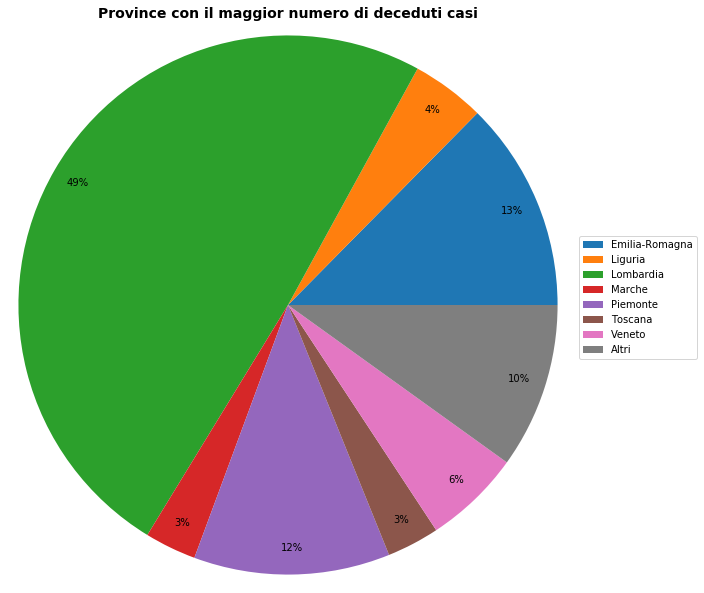

In [18]:
values = []
labels = []
total = 0
lowerTotal = 0
i = 0

for feature in map_layer.getFeatures():
    if feature['Data_deceduti']:
        total += feature['Data_deceduti']

for feature in map_layer.getFeatures():
    if feature['Data_deceduti']:
        if (feature['Data_deceduti']/total) > 0.025:
            values.append(feature['Data_deceduti'])
            labels.append(feature['NAME_1'])
        else:
            lowerTotal += feature['Data_deceduti']
            
            
plt.subplots(figsize=(10,10))
values.append(lowerTotal)
labels.append("Altri") #Outros


pie = plt.pie(values, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2)
plt.title('Province con il maggior numero di deceduti casi', weight='bold', size=14)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.savefig('C:/OSGeo4W64/bin/SIG/IT/deceduti_casi.png', dpi=300, format='png')
plt.show()
plt.clf()
plt.close()

# Gráfico IIX Número de óbitos por COVID19 ao longo dos dias em Lombardia

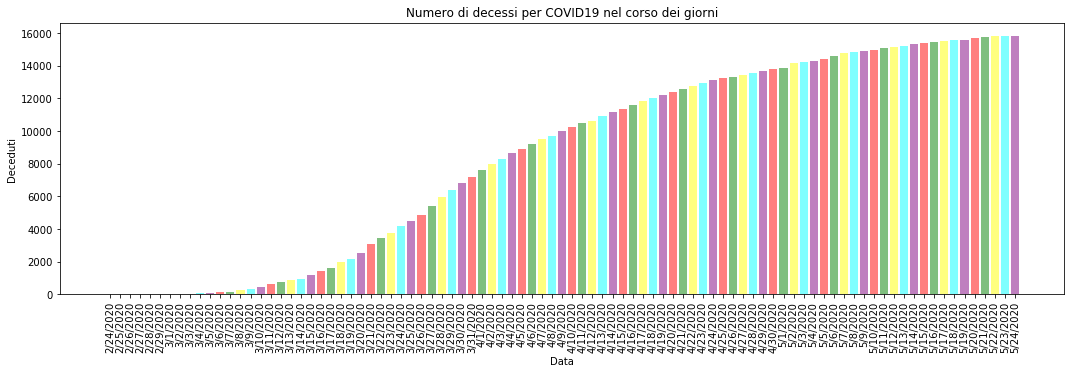

In [19]:
values = []
labels = []
datas = []
lowerTotal = 0
i = 0


for feature in csv_layer.getFeatures():
    if feature['denominazione_regione']=="Lombardia":
        values.append(feature['deceduti'])
        labels.append(feature['data'])

fig, ax = plt.subplots(figsize=(18,5))        
y_pos = np.arange(len(labels))

plt.bar(y_pos, values, align='center', alpha=0.5, color=['purple', 'red', 'green', 'yellow', 'cyan'])
plt.xticks(y_pos, labels, rotation='vertical')
plt.ylabel('Deceduti')
plt.xlabel('Data')
plt.title('Numero di decessi per COVID19 nel corso dei giorni')
plt.savefig('C:/OSGeo4W64/bin/SIG/IT/casi_deceduti_dias.png', dpi=300, format='png')
plt.show()

# Casos Mortalidade por província

In [20]:
df = pd.read_csv(open('C:\\OSGeo4W64\\bin\\SIG\\IT\\AtualITALY.csv'))
df.head()

,data,stato,denominazione_regione,lat,long,ricoverati_con_sintomi,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi
0,5/24/2020,ITA,Abruzzo,42.351222,13.398438,149,152,940,1092,-76,5,1736,398,3226
1,5/24/2020,ITA,Basilicata,40.639471,15.805148,13,14,25,39,-2,1,333,27,399
2,5/24/2020,ITA,P.A. Bolzano,46.499335,11.356624,30,35,160,195,-19,3,2107,291,2593
3,5/24/2020,ITA,Calabria,38.905976,16.594402,43,44,231,275,-13,0,786,96,1157
4,5/24/2020,ITA,Campania,40.839566,14.250850,311,319,949,1268,-5,5,3076,405,4749


In [21]:
data = df.groupby(['denominazione_regione']).sum().reset_index()
data.set_index("denominazione_regione", inplace=True)

In [22]:
length = len(data.columns.tolist())
deceduti = data.columns.tolist()[-2]

sumdata = data[deceduti]
sumdata = sumdata.sort_values(ascending=True)

sumdata

denominazione_regione
Molise                      22
Basilicata                  27
Umbria                      75
Calabria                    96
Sardegna                   129
Valle d'Aosta              143
Sicily                     269
P.A. Bolzano               291
Friuli Venezia Giulia      329
Abruzzo                    398
Campania                   405
Trentino-Alto Adige        457
Apulia                     487
Lazio                      684
Marche                     994
Toscana                   1013
Liguria                   1419
Veneto                    1869
Piemonte                  3783
Emilia-Romagna            4055
Lombardia                15840
Name: deceduti, dtype: int64

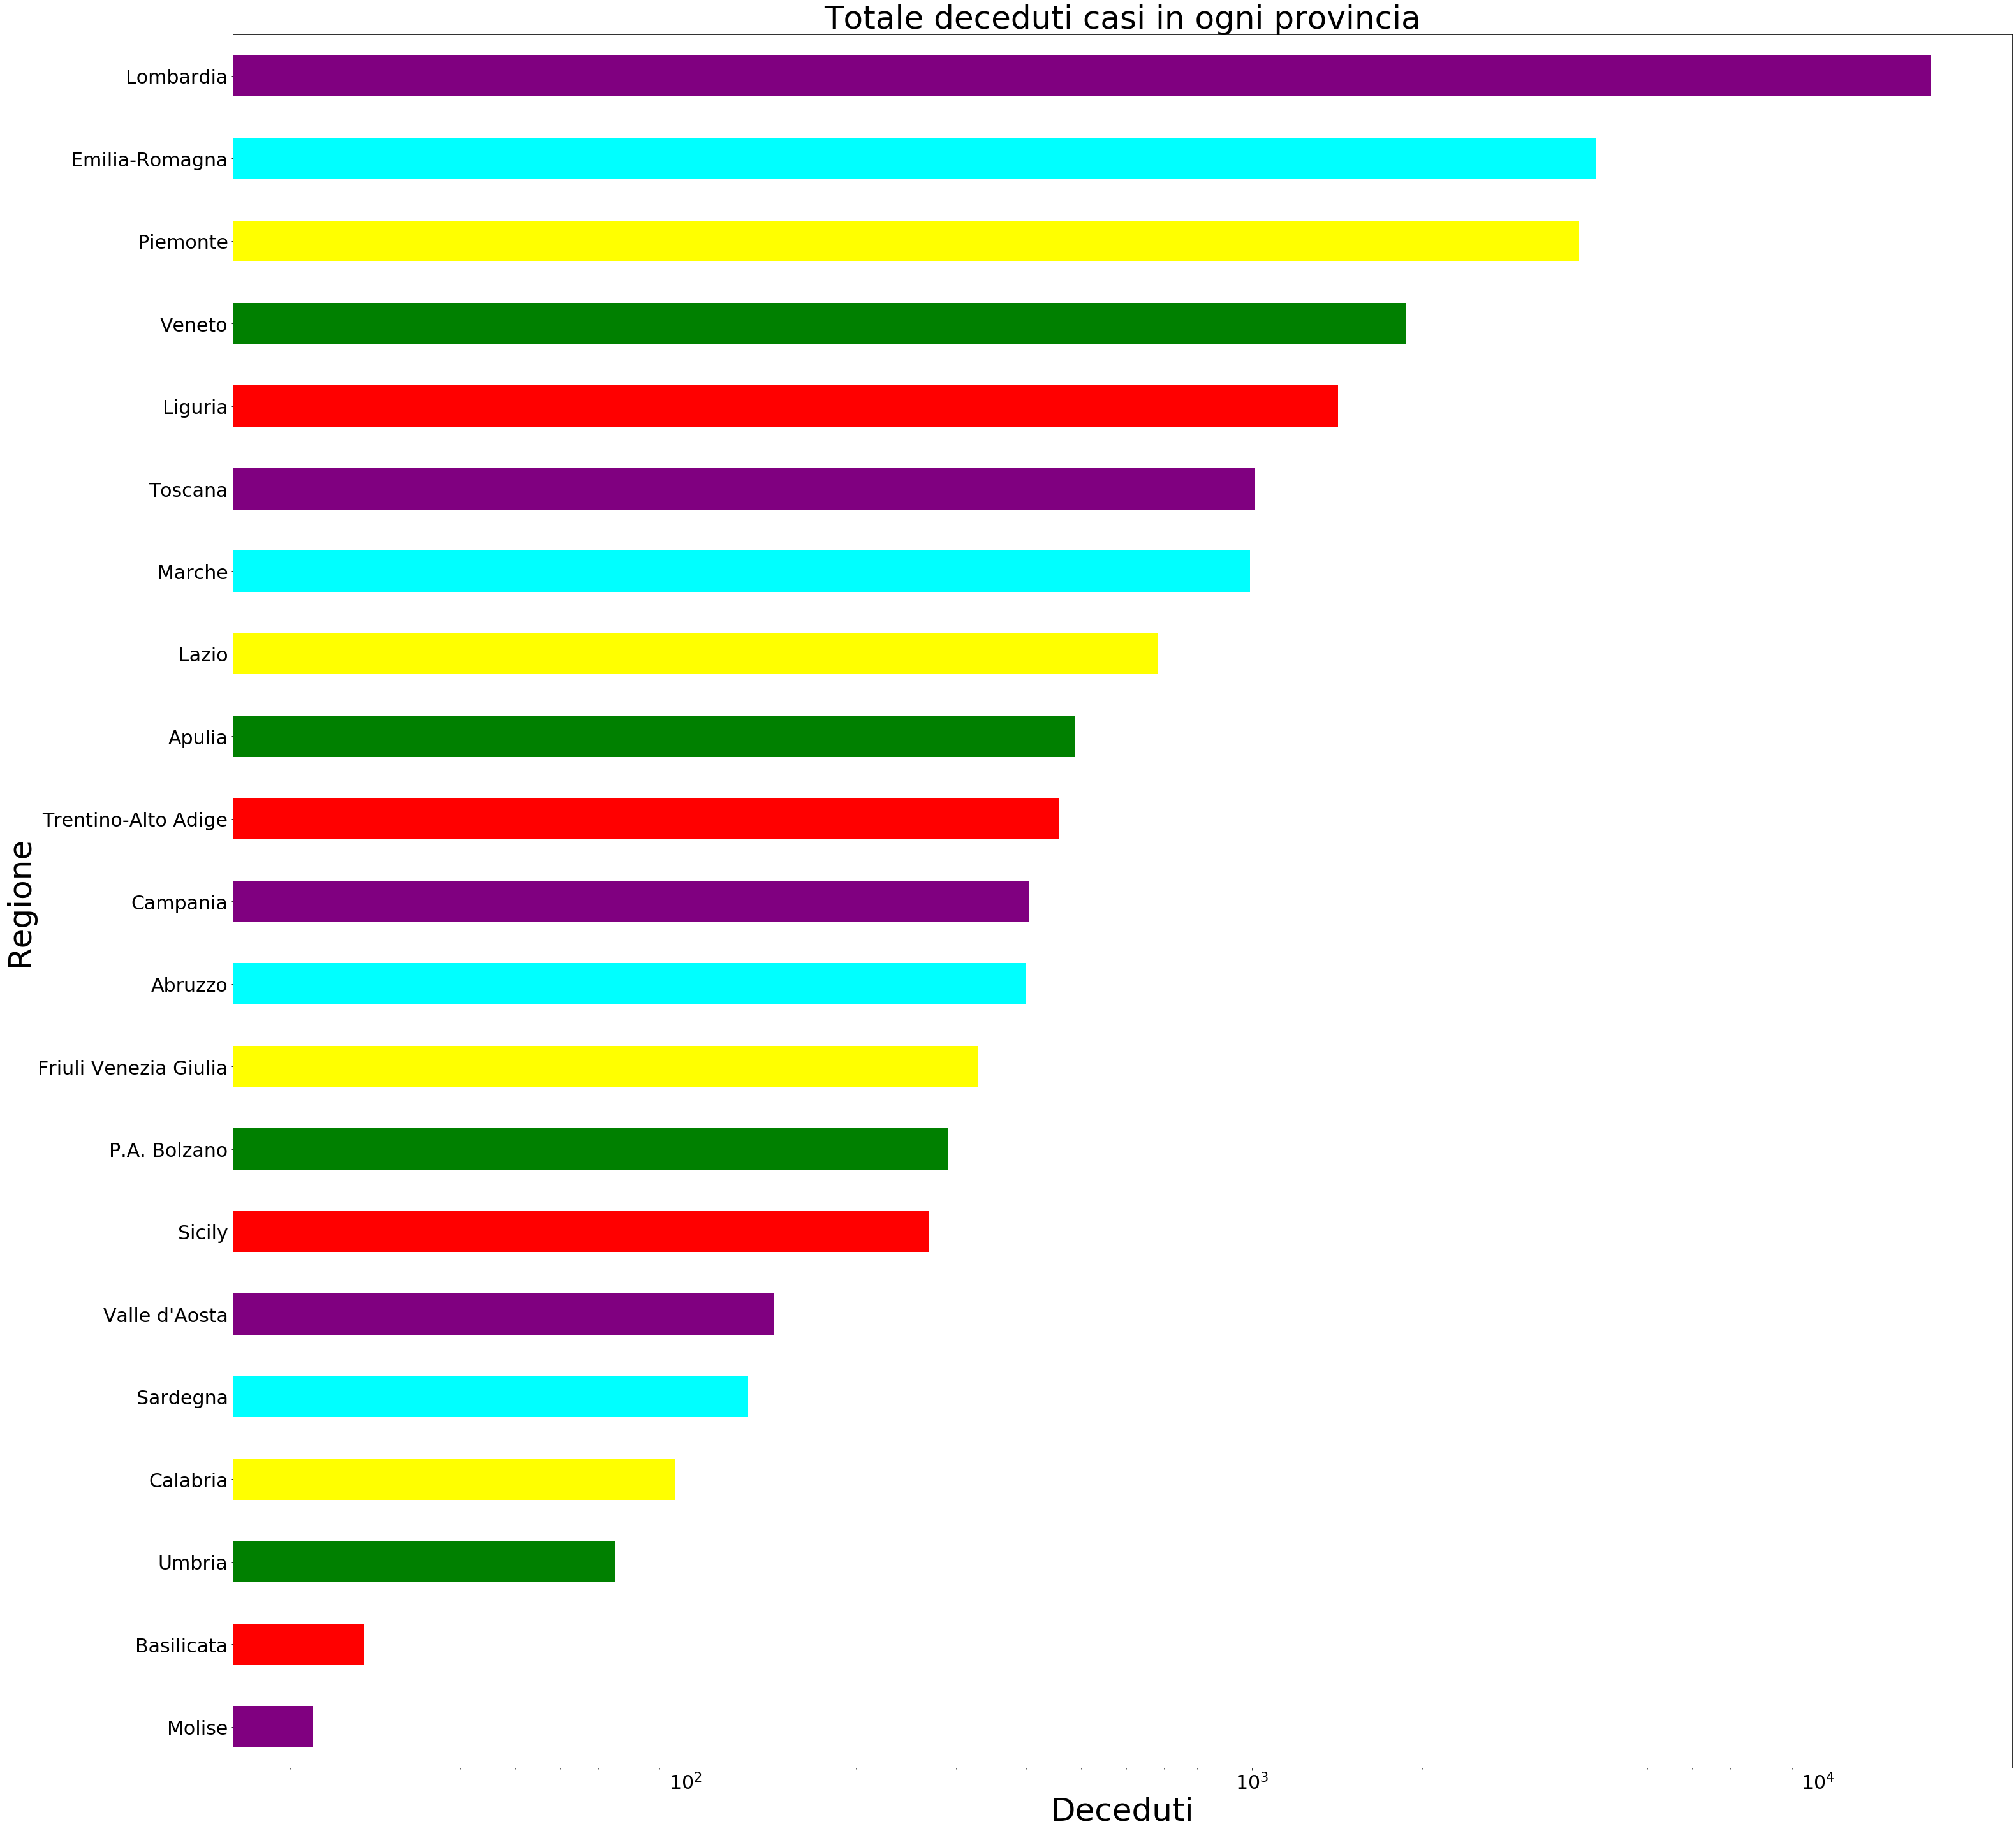

In [23]:
sumdata.plot.barh(figsize=(50,50),fontsize=30, color=['purple', 'red', 'green', 'yellow', 'cyan'])
plt.xscale("log")
plt.ylabel('Regione', fontsize=50)
plt.xlabel('Deceduti', fontsize=50)
plt.title('Totale deceduti casi in ogni provincia', fontsize=50)
plt.savefig('C:/OSGeo4W64/bin/SIG/IT/AtualITALY.png', dpi=300, format='png')
plt.show()